# Lección II

#### _<font color=blue>  Objetivo de la lección: </font>_

<font color=blue>
 Aprender las diferentes fases del Aprendizaje de Datos (ML): Análisis exploratorio  de los datos. 
</font>

La librerias de __Python__ que se usan en esta lección del curso son 

* <b>Pandas</b> para la manipulación e ingesta de los datos
* <b>Matplotlib</b> and <b> seaborn</b> para la vizualización de los datos
* <b>Numpy</b> para computo de arreglos multidimensionales
* <b>sklearn</b> para el aprendizaje de máquinas y el modelado predectivo

### Proceso de Instalación 

Una manera sencilla de installar esta paqueteria es descargar e instalar 
la distribucion <a href="http://conda.pydata.org/docs/install/quick.html#os-x-miniconda-install">Conda</a> que encapsula a todas las librerias mencionadas. Esta distribución esta disponible en todas las plataformas (Windows, Linux and Mac OSX).

### El conjunto de datos (Wisconsin) del Cáncer de mama

Nuestro caso de estudio es el conjunto de datos obtenidos para el cancer de mama en el hospital de Wisconsin. El articulo donde se describe la metología empleada para la obtencion de las caracteristicas de la informacion es

 _[K. P. Bennett y O. L. Mangasarian: "Discriminación robusta de la programación lineal de dos conjuntos linealmente inseparables", Métodos de optimización y software 1, 1992, 23-34]._

#### El conjunto de datos (Wisconsin) del Cáncer de mama
 
Del artículo mencionado, leemos que:

"Cada registro representa información de seguimiento para un caso cáncer de mama. 
Estos  pacientes han sido atentidos por el Dr. Wolberg desde el año 1984,
están incluídos sólo aquellos casos que exhiben cáncer de mama y donde no hay evidencia de metástasis 
a distancia en el tiempo de diagnóstico."


_Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria_ 



<img style="float: center;" src="../images/fna-cell.png">


<h5 align="justify">Imagen ampliada de un seno maligno obtenida con la biopsia FNA (Fine Needle Aspiration). Los núcleos de células visibles se han esbozado con la ayuda de un programa de ajuste de curvas. El sistema también calcula varias características para cada núcleo y diagnostica con precisión la muestra. El proceso de diagnóstico interactivo toma alrededor de 5 minutos por muestra.</h5> 

FUENTE: K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34



Los datos se encuentran en el 
  __[repositorio de aprendizaje automático de UCI:](  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)__  
***
_El repositorio de aprendizaje automático de UCI es una colección de bases de datos, teorías de dominio y generadores de datos que la comunidad de aprendizaje automático utiliza para el análisis empírico de los algoritmos de aprendizaje automático. El archivo fue creado como archivo ftp en 1987 por David Aha y otros estudiantes graduados en UC Irvine. Desde entonces, ha sido ampliamente utilizado por estudiantes, educadores e investigadores de todo el mundo como fuente principal de conjuntos de datos de aprendizaje automático._

<h2 align="center">El flujo de trabajo en un proyecto de ciencia de datos </h2>

El conjunto de  lineamientos específicos ('ducto') en un proyecto de  ciencia de datos varía dependiendo de la naturaleza del mismo. Aquí trabajamos el ducto estandar:

### Análisis exploratorio de los datos

### Ingeniería de Características

### Modelado de datos

 ***
 Especificamente, en esta leccion nos enfocamos en el primer punto


## Análisis exploratorio de los datos

_En estadística, el análisis exploratorio de los datos  representa un enfoque para analizar conjuntos de datos que resumen sus características principales, a menudo con métodos visuales._

Nuestro Análisis exploratorio consiste en las siguientes tareas especificas

 - __Extracción__: Cargar el conjunto de datos y echarles una mirada
 - __Limpieza__: Encontrar los valores que faltan
 - __Visualización__: Crear algunas gráficas interesantes que nos permitan idendificar correlaciones 
 

_Ajustamos un poco el estilo de este libro trabajo para tener graficas centradas_ 

In [4]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


## Análisis exploratorio de los datos

  **Extracción** 
  
  Obtenemos los datos directamente del URL oficial del repositorio de datos. Para ello importamos la biblioteca _requests_

In [5]:
#import wget as wget
import requests
import csv

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'  
local_path = '../data/wisconsin.csv'
wisconsin_data = requests.get(url, allow_redirects=True)

with open(local_path, 'w') as f:
    writer = csv.writer(f)
    reader = csv.reader(wisconsin_data.text.splitlines())

    for row in reader:
        writer.writerow(row)

En el sitio del repositorio podemos encontrar un
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names">archivo con las caracterisiticas de la  información</a>

Más espeficamente el punto siete nos describe los atributos de los datos. Los primeros dos atributos (o caracteristicas) son:

    1) ID 
    2) Diagnosis (M = Maligno, B = Benigno)

Se calculan diez características de valor real para cada núcleo celular:

    a) radio ( media de las distancias desde el centro al perímetro)    
    b) textura (desviación estándar de los valores de escala de grises)
    c) perímetro
    d) área
    e) suavidad (variación local en longitudes de radio)
    f) compacidad (perímetro ^ 2 / área - 1.0)
    g) concavidad (severidad de las porciones cóncavas del contorno)
    h) puntos cóncavos (número de porciones cóncavas del contorno)
    i) simetria
    j) dimensión fractal ("aproximación de la línea de costa" - 1)

La media, el error estándar y el "peor" o mayor (media de las tres
los valores más grandes) de estas características se calcularon para cada imagen,
dando como resultado 30 características. Por ejemplo, el campo 3 es Radio medio, campo
13 es el radio SE, el campo 23 es el peor radio.
    
Todos los valores de las funciones se registran con cuatro dígitos significativos.

### Características de los datos 
***
Los datos del archivo que descargamos, no poseen las correspondientes etiquetas (_a) radio, b) textura,..._). Tenemos 30  mediciones, el ID y el diagnostico. Entonces tenemos un número total de 32 atributos.  Las siguientes instrucciónes nos crea un arreglo de caracteristicas.  

In [6]:
features =  ['a:radio','b:textura','c:perimetro', \
             'd:area', 'e:suavidad','f:compactes', \
             'g:concavidad', 'h:puntos_concavos','i:simetria',\
             'j:dimension_fractal']

columns_all = ['ID', 'Diagnostico'] + \
              list(map(lambda x: x[2:] + '_promedio', features)) + \
              list(map(lambda x: x[2:] + '_error', features)) +  \
              list(map(lambda x: x[2:] + '_peor', features))

El manejo de los datos estará a cargo de la libreria **Pandas**.

**Pandas**, una herramienta de análisis de datos para el lenguaje de programación Python, es actualmente la herramienta de análisis de datos abierta más popular y madura. La biblioteca está altamente optimizada para el rendimiento, con rutas de código críticas escritas en _Cython_ o _C_.

Cargamos el conjunto de datos:

In [7]:
import pandas as pd

data = pd.read_csv('../data/wisconsin.csv', names = columns_all);
data = data.reset_index().drop(columns =['index'])

Echamos un vistazo a los datos. Listamos un numero aleatorio de 5 registros:

In [8]:
data.sample(5)

,ID,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
141,869104,M,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.059430,...,19.920,25.27,129.00,1233.0,0.1314,0.2236,0.2802,0.12160,0.2792,0.08158
189,874839,B,12.300,15.90,78.83,463.7,0.08080,0.07253,0.03844,0.016540,...,13.350,19.59,86.65,546.7,0.1096,0.1650,0.1423,0.04815,0.2482,0.06306
94,862028,M,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.088150,...,18.230,24.23,123.50,1025.0,0.1551,0.4203,0.5203,0.21150,0.2834,0.08234
199,877500,M,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.059800,...,18.330,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130
412,905539,B,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,...,9.965,27.99,66.61,301.0,0.1086,0.1887,0.1868,0.02564,0.2376,0.09206



### Analisis exploratorio de los datos

  **Limpieza** 
  
  El analisis de datos en el aprendizaje de las maquinas supone uniformadidad de los datos para un mismo atributo.
  Cuando extraemos los datos pueden que no esten presentados  de manera uniforme (por ejemplo alguna medicion pudo no haberse efectuado y en ese casa el atributo para ese registro presenta un valor nulo) y un proceso de limpieza se vuelve mandatorio.
  En nuestro caso, el <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"> archivo de atributos </a> especifica que:
  
      8. Valores de atributo faltantes: ninguno
      
Por lo que no hay datos faltantes. 

***
La limpieza de datos es tan importante para el analisis de datos, que **Pandas** tiene cargados metodos de deteccion de valores nulos:

Verificamos que  todos los registros estan llenos
***

In [9]:
data.isnull().sum()

ID                            0
Diagnostico                   0
radio_promedio                0
textura_promedio              0
perimetro_promedio            0
area_promedio                 0
suavidad_promedio             0
compactes_promedio            0
concavidad_promedio           0
puntos_concavos_promedio      0
simetria_promedio             0
dimension_fractal_promedio    0
radio_error                   0
textura_error                 0
perimetro_error               0
area_error                    0
suavidad_error                0
compactes_error               0
concavidad_error              0
puntos_concavos_error         0
simetria_error                0
dimension_fractal_error       0
radio_peor                    0
textura_peor                  0
perimetro_peor                0
area_peor                     0
suavidad_peor                 0
compactes_peor                0
concavidad_peor               0
puntos_concavos_peor          0
simetria_peor                 0
dimensio


  NO utlizaremos el 'ID' del paciente. Por lo que lo eliminamos de nuestros datos.

In [10]:
data = data.drop(columns='ID')
data.sample(2)

,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
395,B,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.03251,0.1641,...,14.92,25.34,96.42,684.5,0.1066,0.1231,0.0846,0.07911,0.2523,0.06609
86,M,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,...,16.21,29.25,108.40,808.9,0.1306,0.1976,0.3349,0.12250,0.3020,0.06846



### Analisis exploratorio de los datos

  **Visualización: Tablas** 
  
Pandas te permite tener una descripción estadística simple de alto nivel de las características numéricas. Esto se puede hacer usando el método de descripción.
   

In [11]:
data.describe()

,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,dimension_fractal_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


En _estadística_, la desviación estándar (representada por el índice **std** en la anterior tabla) es una medida que se utiliza para cuantificar la cantidad de variación o dispersión de un conjunto de valores de datos.  Una baja desviación estándar indica que los puntos de datos tienden a estar cerca de la media (también llamado el valor esperado) del conjunto, mientras que una alta desviación estándar indica que los puntos de datos se extienden en un rango más amplio de valores

**Visualización: Gráficas** 

La visualización de los datos a través gráficas facilita la comprensión de la información que se quiere analizar. También ayuda a explicar los datos a otra persona.

Python tiene varias bibliotecas de visualización interesantes, como Matplotlib, Seaborn, etc. Los datos de nuestros atributos son valores númericos. Para darnos una idea de como se encuentran distribuídos se agrupan en intervalos especificos. Después se generan las gráficas para estás distribuiciones


***
Se usan en parte la visualización de pandas que se construye sobre matplotlib, para encontrar la distribución de datos de los atributos: 

In [12]:
#Visualization of data
data.groupby('Diagnostico').hist(figsize=(13, 16),xlabelsize = 5, ylabelsize = 5)

Diagnostico
B    [[AxesSubplot(0.125,0.777333;0.125x0.102667), ...
M    [[AxesSubplot(0.125,0.777333;0.125x0.102667), ...
dtype: object

Como se ve, **pandas**  genera histrogramas haciendo divisiones automaticas en los intervalos de los datos. A veces se necesita ser más específico en como divideremos las información y es necesario generar rutinas de codigo adicionales.

El manejo de números con decimales se realiza usando la librería **numpy**


La siguiente funcion agrupa los datos de una columna en intevarlos iguales:

In [17]:
import numpy as np

def divide_en_intervalos(columna,tajada):
    
    minimo = data[columna].min()
    maximo = data[columna].max()
    
    intervalos = np.linspace(minimo, maximo,tajada)
        
    return pd.cut(np.float64(data[columna]), intervalos,precision=4,right=True,include_lowest=True)
   

Con esta funcion, construimos otra funcion que itera sobre todas las columnas de nuestros datos numericos (quitamos la columna 'Diagnostico'):

In [18]:
def intervalos(tajada):
    
    data_numerical = data.drop(columns=['Diagnostico'])
    intervalos = {}
    
    for column in data_numerical:
        
        intervalos[column] = divide_en_intervalos(column,tajada + 1)      
    
    return intervalos


_EJEMPLO._ El caso de 5 intervalos para el _radio promedio_:

In [19]:
print(intervalos(5)['radio_promedio'].describe())        

                    counts     freqs
categories                          
(6.9809, 11.2068]       98  0.172232
(11.2068, 15.4326]     314  0.551845
(15.4326, 19.6584]     105  0.184534
(19.6584, 23.8842]      45  0.079086
(23.8842, 28.11]         7  0.012302



Los datos de nuestros atributos son valores númericos.

Para darnos una idea de como se encuentran distribuídos los agrupamos en intervalos especificos. 

Después generamos gráficas para estás distribuiciones
***

Creamos la columnas booleanas _Benigno_ y _Maligno_

La columna _Benigno_ es igual a 1 si el diagnostico es 'Benigno' y 0 si es 'Maligno'

La columna _Maligno_ es igual a 0 si el diagnostico es 'Benigno' y 1 si es 'Maligno'

In [20]:
data['Benigno'] = (data['Diagnostico']=='B')*1
data['Maligno'] = 1 - data['Benigno']

¿Qué relación guardan la forma del núcleo de la célula con la incidencia en el cáncer?

Para darnos una idea, hacemos un histograma de los casos positivos y negativos agrupados en los grupos de tamaño que escogimos anteriormente

**pandas** trae incorporada rutinas de gráficos que importa de la librería **matplotlib** (especificamente la sublibrería **pyplot**) y la librería **seaborn**

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

Definimos una función que genera un histograma que compara casos benignos y malignos en cada conjunto de intervalos númericos para un atributo en específico:

In [22]:
def histograma_benigno_maligno(intervalo,atributo,xdecimales):
    
    agrupado = data.groupby(intervalo[atributo])[['Benigno','Maligno']].sum();
    ax = agrupado.plot.bar(
                          rot=0, \
                          figsize=(5, 5),\
                          width = 0.9, \
                          stacked=True, 
                          title = atributo,   
                          color=['blue', 'r']
                        );
    
    xlabels = [str(np.around(c.left,decimals=xdecimales)) + ' a ' + str(np.around(c.right,decimals=xdecimales)) \
               for c in  agrupado.index.values];

    ax.set_xticklabels(xlabels,fontsize=8);
    
    return ax

Por ejemplo, el histograma para el radio promedio divido en tres tajadas es:

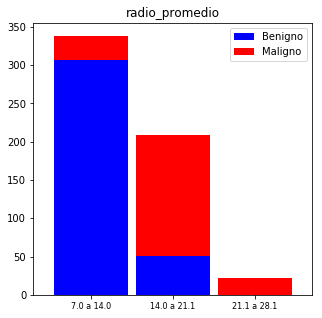

In [23]:
ax = histograma_benigno_maligno(intervalos(3),'radio_promedio',1)
plt.show()

Vemos que los radios mas pequeños representan mayores casos de cáncer. Mientras que los radios más grandes son casi todos casos malignos. Veamos si esta tendencia se mantiene al nivel de áreas y perímetros: 

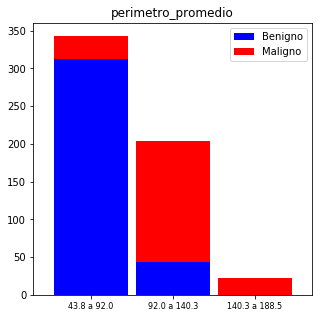

In [24]:
ax = histograma_benigno_maligno(intervalos(3),'perimetro_promedio' ,1)

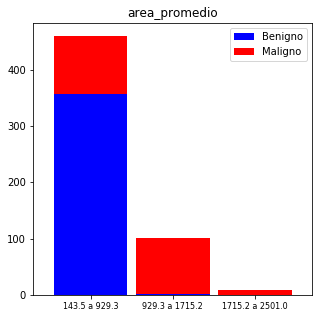

In [25]:
ax = histograma_benigno_maligno(intervalos(3),'area_promedio',1 )

Se observa que en caso del área, se agudiza más la tendencia discutida en el caso del radio:

1) La mayoría de los casos de cancer aparecen en áreas pequeñas.

2) Las áreas pequeñas representan en su mayoría casos benignos, mientras que las áreas grandes representan en su mayoría casos malignos
***


Observe ahora que sucede con los atributos que están relacionados no con la _extension_ de  los núcleos sino con lo _características_ de la figura. Uno de estos atributos son  la dimensión fractal y la simetría:

![](../images/symmetry.png)

<div style="text-align: center"> Para medir la simetría, se encuentra el eje mayor, o el acorde más largo a través del centro. Luego, se mide la diferencia de longitud entre las líneas perpendiculares al eje mayor del límite de la celda en ambas direccione. </div>

Otro atributo  es la _simetría_:

![](../images/fractal_dimension.png)

<div style="text-align: center"> La dimensión fractal de una celda se aproxima utilizando la aproximación de "línea de costa" descrita por Mandelbrot. El perímetro del núcleo se mide utilizando 'reglas' cada vez más grandes. A medida que aumenta el tamaño de la regla, disminuye la precisión de la medición y disminuye el perímetro observado. Al trazar estos valores en una escala logarítmica y medir la pendiente descendente se obtiene (el negativo de) una aproximación a la dimensión fractal. Al igual que con todas las características de la forma, un valor más alto corresponde a un contorno menos regular y, por lo tanto, a una mayor probabilidad de malignidad. </div>

[_REFERENCIA_: Nuclear feature extraction for breast tumor diagnosis
W. Nick Street, W. H. Wolberg, O. L. Mangasarian, Proceedings Volume 1905, Biomedical Image Processing and Biomedical Visualization; (1993) ]



***
Haga histogramas para estos dos atributos:

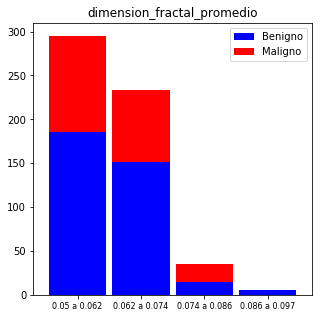

In [28]:
ax = histograma_benigno_maligno(intervalos(4),'dimension_fractal_promedio',3 )

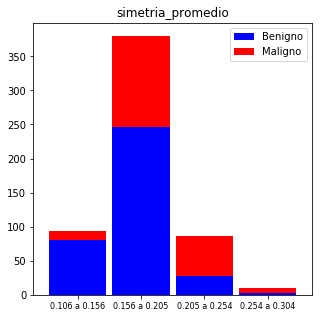

In [29]:
ax = histograma_benigno_maligno(intervalos(4),'simetria_promedio',3 )

La distribución de tamaños en intervalos iguales no influye de manera tan decisiva en el tipo de cáncer (Maligno vs Benigno) como en el caso de áreas, radios y perímetros.

### Conclusiones 

Se ha observado como las diferentes características de los datos arrojan patrones que permiten  diferenciar los casos malignos de los casos beginos. Una buena ingeniería de características se vuelve de vital importancia  cuando los conjuntos de datos son grandes y ademas ayudan a evitar el fenoneno de 'overfitting'.

En la siguiente sección se implementan las rutinas de Aprendizaje de Datos que permitirán ofrecer predicciones a partir de el conjunto de datos